## Modelos de classificação

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [3]:
# Carregando o conjunto de dados CSV em um DataFrame
df = pd.read_csv('data/iris.data', header=None)

df.columns = ["sepal_length", "sepal_width", "petal_length", "petal_width", "species"]

In [4]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
# Separando as features (X) e a classe (y)
# X -> São as features (Conjunto de dados de entrada que alimentam o modelo)
x = df[[
    "sepal_length",
    "sepal_width", 
    "petal_length",
    "petal_width"
    ]]

# Y -> É a classe (TARGET)
y = df["species"]

In [6]:
x

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [7]:
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: species, Length: 150, dtype: object

In [8]:
# Dividindo o conjunto de dados em 70% para treinamento e 30% para teste
# RANDOM STATE -> Sempre que rodar o código, a divisão será a mesma
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=23)

## Regrassão Logistica

In [ ]:
from sklearn.linear_model import LogisticRegression

# Criando e treinando o modelo de Regressão Logística
modelo = LogisticRegression()
modelo.fit(x_train, y_train) # .fit -> treinamento de modelo

LogisticRegression()

In [20]:
# Fazendo previsões sobre o conjunto de dados de teste
y_pred = modelo.predict(x_test)
y_pred[:5]

array(['Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica'], dtype=object)

In [ ]:
y_test[:5]

139     Iris-virginica
125     Iris-virginica
67     Iris-versicolor
3          Iris-setosa
113     Iris-virginica
Name: species, dtype: object

In [23]:
# Calculando métricas de desempenho (acurácia, precisão, revocação e F1-Score)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
f1 = f1_score(y_test, y_pred, average='micro')

print("Acurácia:", accuracy)
print("Precisão:", precision)
print("Revocação:", recall)
print("F1-Score:", f1)

Acurácia: 1.0
Precisão: 1.0
Revocação: 1.0
F1-Score: 1.0


## KNN

In [24]:
from sklearn.neighbors import KNeighborsClassifier

# Criando e treinando o modelo KNN com K=3 vizinhos
modelo = KNeighborsClassifier(n_neighbors=3)
modelo.fit(x_train, y_train)

# Fazendo previsões sobre o conjunto de dados de teste
y_pred = modelo.predict(x_test)

# Calculando a acurácia do modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia: {accuracy}")

Acurácia: 0.9777777777777777


In [25]:
# Relação da acurácia com a quantidade de vizinhos
number_neighbors = range(1, 106)
accuracy_dict = dict()

for i in number_neighbors:
    knn_model=KNeighborsClassifier(n_neighbors=i)
    knn_model.fit(x_train, y_train)
    y_pred = knn_model.predict(x_test)
    accuracy_dict[i] = accuracy_score(y_test, y_pred)

In [26]:
print(accuracy_dict)

{1: 0.9777777777777777, 2: 0.9777777777777777, 3: 0.9777777777777777, 4: 0.9777777777777777, 5: 1.0, 6: 0.9777777777777777, 7: 1.0, 8: 1.0, 9: 1.0, 10: 0.9777777777777777, 11: 1.0, 12: 1.0, 13: 1.0, 14: 1.0, 15: 1.0, 16: 1.0, 17: 1.0, 18: 1.0, 19: 1.0, 20: 1.0, 21: 0.9777777777777777, 22: 0.9555555555555556, 23: 0.9777777777777777, 24: 0.9555555555555556, 25: 0.9555555555555556, 26: 0.9777777777777777, 27: 0.9777777777777777, 28: 0.9777777777777777, 29: 0.9777777777777777, 30: 0.9777777777777777, 31: 0.9555555555555556, 32: 0.9555555555555556, 33: 0.9555555555555556, 34: 0.9555555555555556, 35: 0.9555555555555556, 36: 0.9555555555555556, 37: 0.9777777777777777, 38: 0.9555555555555556, 39: 0.9555555555555556, 40: 0.9555555555555556, 41: 0.9555555555555556, 42: 0.9555555555555556, 43: 0.9555555555555556, 44: 0.9333333333333333, 45: 0.9333333333333333, 46: 0.9333333333333333, 47: 0.9333333333333333, 48: 0.9333333333333333, 49: 0.9333333333333333, 50: 0.9333333333333333, 51: 0.933333333333

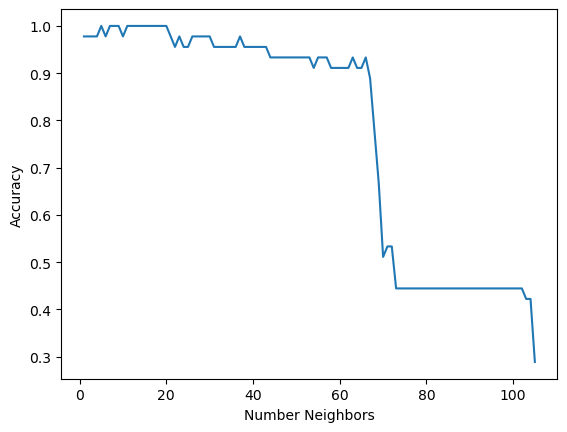

In [28]:
import matplotlib.pyplot as plt  

plt.plot(number_neighbors, accuracy_dict.values())
plt.xlabel("Number Neighbors")
plt.ylabel("Accuracy")
plt.show()